# NFL Big Data Bowl 2021 Data Exploration

This notebook explores the dataset given in the [NFL Big Data Bowl 2021 Kaggle competition](https://www.kaggle.com/c/nfl-big-data-bowl-2021/overview). The dataset used is NFL’s Next Gen Stats 2018 data, which includes comprehensive information on all plays and players for the entire 2018 season.

## Import the libraries

In [46]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
from IPython.display import display
import sklearn
import seaborn as sns

# Pandas options
pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', None)

# Seaborn options
sns.set_theme()

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [47]:
nfl_data = pd.read_csv('data/plays.csv')
nfl_data.describe(include='all')

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
count,1.92e+04,19239.00,19239,19239.00,19239.00,19239.00,19239,19239,18985,19239.00,19098,19210,19177.00,18606.00,19210,18600,18600.00,18600.00,18600,18600.00,1206,1206,19237,19239.00,19239.00,19239.00,19239
unique,NaN,NaN,19235,NaN,NaN,NaN,32,3,32,NaN,7,56,NaN,NaN,56,7,NaN,NaN,901,NaN,86,666,5,NaN,NaN,NaN,2
top,NaN,NaN,(:05) R.Wilson spiked the ball to stop the clock.,NaN,NaN,NaN,PIT,play_type_pass,GB,NaN,SHOTGUN,"1 RB, 1 TE, 3 WR",NaN,NaN,"4 DL, 2 LB, 5 DB",TRADITIONAL,NaN,NaN,15:00:00,NaN,DPI,NO 25,C,NaN,NaN,NaN,False
freq,NaN,NaN,2,NaN,NaN,NaN,738,17346,672,NaN,12627,13716,NaN,NaN,6652,15645,NaN,NaN,364,NaN,242,10,11370,NaN,NaN,NaN,18980
mean,2.02e+09,2176.22,NaN,2.59,1.92,8.92,NaN,NaN,NaN,29.86,NaN,NaN,6.04,4.22,NaN,NaN,10.76,12.47,NaN,59.91,NaN,NaN,NaN,6.28,6.47,0.02,NaN
std,1.15e+04,1240.92,NaN,1.12,0.85,3.97,NaN,NaN,NaN,12.44,NaN,NaN,1.02,0.90,NaN,NaN,9.80,10.55,NaN,23.64,NaN,NaN,NaN,10.18,10.57,1.58,NaN
min,2.02e+09,50.00,NaN,1.00,1.00,1.00,NaN,NaN,NaN,1.00,NaN,NaN,1.00,0.00,NaN,NaN,0.00,0.00,NaN,11.00,NaN,NaN,NaN,-19.00,-78.00,-11.94,NaN
25%,2.02e+09,1125.00,NaN,2.00,1.00,6.00,NaN,NaN,NaN,21.50,NaN,NaN,6.00,4.00,NaN,NaN,3.00,3.00,NaN,40.00,NaN,NaN,NaN,0.00,0.00,-0.75,NaN
50%,2.02e+09,2166.00,NaN,3.00,2.00,10.00,NaN,NaN,NaN,30.00,NaN,NaN,6.00,4.00,NaN,NaN,9.00,10.00,NaN,60.00,NaN,NaN,NaN,4.00,4.00,-0.19,NaN
75%,2.02e+09,3203.50,NaN,4.00,3.00,10.00,NaN,NaN,NaN,40.00,NaN,NaN,7.00,5.00,NaN,NaN,17.00,20.00,NaN,80.00,NaN,NaN,NaN,10.00,11.00,0.98,NaN


In [48]:
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [49]:
nfl_data.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.26,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.37,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.70,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.05,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.84,False


## Data Cleaning and Imputation

In [50]:
# Drop irrelevant columns
nfl_cleaned = nfl_data.drop(columns=[
    'gameId', 
    'playId', 
    'playDescription', 
    'possessionTeam', 
    'playType', 
    'yardlineNumber', 
    'yardlineSide',
    'penaltyJerseyNumbers',
    'penaltyCodes',
    'offensePlayResult',
    'playResult'
])

In [51]:
# Look at null values
nfl_cleaned.isnull().sum()

quarter                     0
down                        0
yardsToGo                   0
offenseFormation          141
personnelO                 29
defendersInTheBox          62
numberOfPassRushers       633
personnelD                 29
typeDropback              639
preSnapVisitorScore       639
preSnapHomeScore          639
gameClock                 639
absoluteYardlineNumber    639
passResult                  2
epa                         0
isDefensivePI               0
dtype: int64

In [52]:
# Drop pass result rows with nans
nfl_cleaned = nfl_cleaned.dropna(subset=['passResult'])

In [53]:
# Add game clock column under 2 minutes
def is_under_minutes(mins=2):
    def _is_under(x: str) -> bool:
        if pd.isna(x):
            return False
        num_rep = int("".join(filter(str.isdigit, x)))
        return num_rep <= mins*10000
    return _is_under

nfl_cleaned['under2mins'] = nfl_cleaned['gameClock'].apply(is_under_minutes(2))
nfl_cleaned = nfl_cleaned.drop(columns=['gameClock'])

In [54]:
# Fill in columns with missing data
# nfl_cleaned['playType'].fillna(nfl_data['playType'].mode()[0], inplace=True)
nfl_cleaned['offenseFormation'].fillna(nfl_data['offenseFormation'].mode()[0], inplace=True)
nfl_cleaned['personnelO'].fillna(nfl_data['personnelO'].mode()[0], inplace=True)
nfl_cleaned['personnelD'].fillna(nfl_data['personnelO'].mode()[0], inplace=True)
nfl_cleaned['typeDropback'].fillna(nfl_data['typeDropback'].mode()[0], inplace=True)
nfl_cleaned['numberOfPassRushers'].fillna(nfl_data['numberOfPassRushers'].median(), inplace=True)
nfl_cleaned['preSnapVisitorScore'].fillna(nfl_cleaned['preSnapVisitorScore'].median(), inplace=True)
nfl_cleaned['preSnapHomeScore'].fillna(nfl_cleaned['preSnapHomeScore'].median(), inplace=True)
nfl_cleaned['isDefensivePI'].fillna(nfl_cleaned['isDefensivePI'].mode(), inplace=True)
nfl_cleaned['defendersInTheBox'].fillna(nfl_cleaned['defendersInTheBox'].median(), inplace=True)
nfl_cleaned['absoluteYardlineNumber'].fillna(nfl_cleaned['absoluteYardlineNumber'].median(), inplace=True)

In [171]:
# Ensure there are no more missing values
# nfl_cleaned.isnull().sum()

In [172]:
# View uniques for the discrete attributes
# discrete_attrs = ['playType', 'offenseFormation', 'personnelO', 'personnelD', 'typeDropback', 'passResult']
discrete_attrs = ['offenseFormation', 'personnelO', 'personnelD', 'typeDropback', 'passResult']
print('Attribute unique values')
print('-'*30)
for attr in discrete_attrs:
        print(f'{attr}: {len(nfl_cleaned[attr].unique())}')

In [57]:
# Encode the categorical attributes as integers
discrete_labels = {} # Store the labels found
for attr in discrete_attrs:
    nfl_cleaned[attr], uniques = pd.factorize(nfl_cleaned[attr])
    discrete_labels[attr] = uniques

nfl_cleaned.shape

(19237, 16)

## Classification

For the attributes that are nominal, we will convert their values into one-hot encoded vectors; that is, we will create features of asymmetric binary attributes for each category. We do this because there is no inherent order associated with the attributes, and we do not want the classifiers to believe there is.

In [61]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

nfl_cleaned_class = nfl_cleaned.copy()

train_discrete_attrs = list(filter(lambda x: x != 'passResult', discrete_attrs))

# Transform the nominal attributes
for attr in train_discrete_attrs:
    ohe = OneHotEncoder()
    attr_feature_arr = ohe.fit_transform(nfl_cleaned[[attr]]).toarray()
    attr_labels = [f'{attr}_{l}' for l in list(discrete_labels[attr])]
    attr_features = pd.DataFrame(attr_feature_arr, columns=attr_labels)
    attr_features.reset_index(drop=True, inplace=True)
    nfl_cleaned_class.reset_index(drop=True, inplace=True)
    nfl_cleaned_class = pd.concat([nfl_cleaned_class, attr_features], axis=1)

Drop the original nominal attributes except the play results

In [62]:
nfl_cleaned_class = nfl_cleaned_class.drop(columns=train_discrete_attrs)

Scale the continuous-valued attributes using sklearn's `RobustScaler`

In [63]:
from sklearn.preprocessing import RobustScaler

continuous_attrs = [
    'quarter', 
    'down', 
    'yardsToGo', 
    'defendersInTheBox', 
    'numberOfPassRushers',
    'preSnapVisitorScore',
    'preSnapHomeScore',
    'absoluteYardlineNumber',
#     'offensePlayResult',
#     'playResult',
    'epa'
]

rs = RobustScaler()

nfl_cleaned_class[continuous_attrs] = rs.fit_transform(nfl_cleaned_class[continuous_attrs])

Change the boolean types to 0/1

In [64]:
nfl_cleaned_class['under2mins'] = nfl_cleaned_class['under2mins'].astype(int)

Pull out the EPA (which should not be used for classification since it is recorded after the result of a play)

In [65]:
nfl_cleaned_class = nfl_cleaned_class.drop(columns=['epa'])

## Split for Train/Test

Finally, split the data for training and testing

In [66]:
from sklearn.model_selection import train_test_split

X = nfl_cleaned_class.drop(columns=['passResult'])
y = nfl_cleaned_class['passResult'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Define a utility function to print off various metrics

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_scores(pred, expected):
    print('Summary')
    print('-'*30)
    print(f'Accuracy: {accuracy_score(pred, expected)}')
    print(f'Precision: {precision_score(pred, expected, average="weighted")}')
    print(f'Recall: {recall_score(pred, expected, average="weighted")}')
    print(f'F1-Score: {f1_score(pred, expected, average="weighted")}')

Import necessary functions for classifying and do some initialization

In [68]:
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

### Linear SVM Classifier

In [69]:
from sklearn.svm import LinearSVC

l_svm = LinearSVC()
results = cross_validate(l_svm, X_train, y_train, scoring=scoring, n_jobs=-1, return_estimator=True)

In [70]:
best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
y_pred = best_estimator.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.6174636174636174
Precision: 0.8484805569990853
Recall: 0.6174636174636174
F1-Score: 0.6929469912531712


### SVM Classifier

In [71]:
from sklearn.svm import SVC

svm = SVC()
results = cross_validate(svm, X_train, y_train, cv=3, scoring=scoring, n_jobs=-1, return_estimator=True)

In [72]:
best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
y_pred = best_estimator.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.6127858627858628
Precision: 0.8857562143991938
Recall: 0.6127858627858628
F1-Score: 0.7032945412776034


### KNN Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights='distance', n_neighbors=7)
params = {
    'metric': ['euclidean', 'hamming']
}
clf = GridSearchCV(knn, params, n_jobs=-1, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   59.9s remaining:   25.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.2min finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=7, weights='distance'),
             n_jobs=-1, param_grid={'metric': ['euclidean', 'hamming']},
             verbose=2)

In [74]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.58004158004158
Precision: 0.6820840566322914
Recall: 0.58004158004158
F1-Score: 0.6189912061391426


In [75]:
clf.best_params_

{'metric': 'hamming'}

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
results = cross_validate(lr, X_train, y_train, cv=3, scoring=scoring, n_jobs=-1, return_estimator=True)

In [77]:
best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
y_pred = best_estimator.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.6195426195426196
Precision: 0.8528160161845532
Recall: 0.6195426195426196
F1-Score: 0.6955943876650265


### Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
params = {
    'max_depth': list(range(1, 10)),
    'max_features': [60, 100, 120, 'log2', None]
}
clf = GridSearchCV(dt, params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [60, 100, 120, 'log2', None]})

In [79]:
clf.best_params_

{'max_depth': 6, 'max_features': 100}

In [80]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.6122661122661123
Precision: 0.80723801323999
Recall: 0.6122661122661123
F1-Score: 0.6774098508365438


In [81]:
# sklearn.__version__
from sklearn import tree

In [82]:
vis_tree = DecisionTreeClassifier(max_depth = 4)
# vis_tree = DecisionTreeClassifier(max_depth = clf.best_params_['max_depth'], max_features = clf.best_params_['max_features'])

In [83]:
vis_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [84]:
# tree.plot_tree(vis_tree);

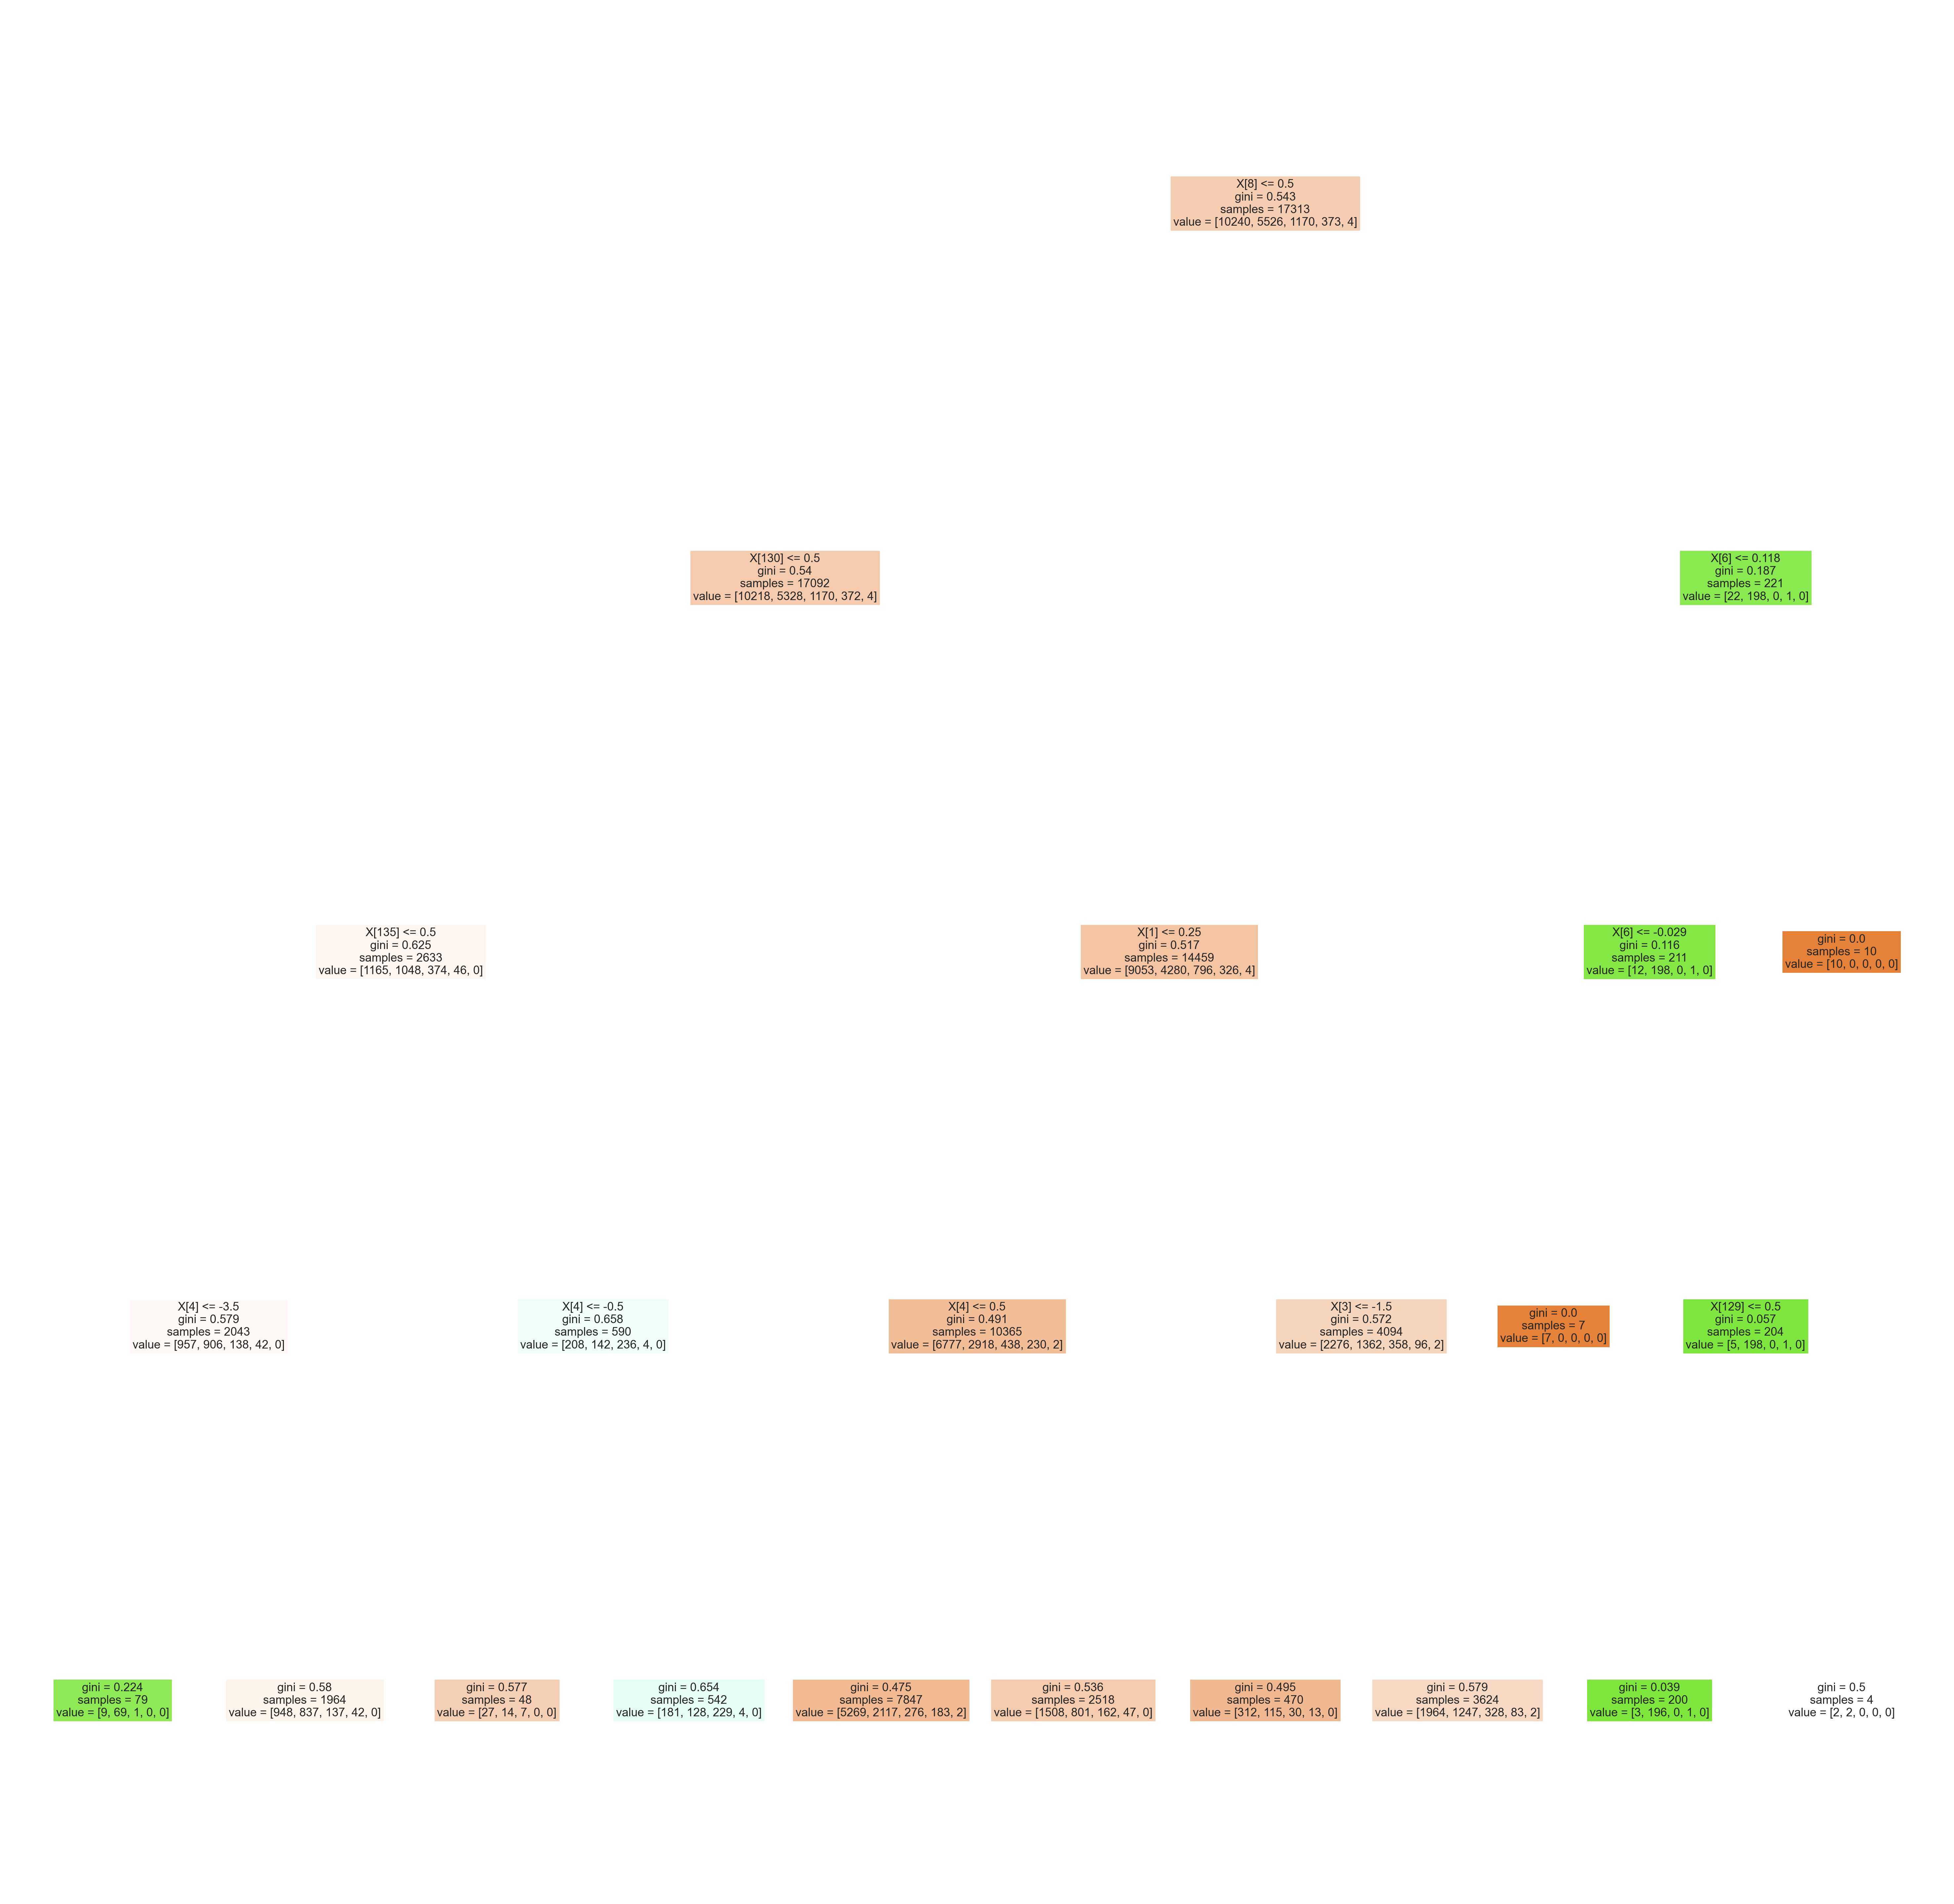

In [85]:
# fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
# cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=500)

# tree.plot_tree(clf, feature_names = fn, class_names=cn, filled = True);
tree.plot_tree(vis_tree, filled = True);
fig.savefig('DT-fixed-slides.png')

In [86]:
X

,quarter,down,yardsToGo,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,isDefensivePI,under2mins,offenseFormation_I_FORM,offenseFormation_SINGLEBACK,offenseFormation_SHOTGUN,offenseFormation_EMPTY,offenseFormation_PISTOL,offenseFormation_WILDCAT,offenseFormation_JUMBO,"personnelO_2 RB, 1 TE, 2 WR","personnelO_1 RB, 1 TE, 3 WR","personnelO_2 RB, 3 TE, 0 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_2 RB, 0 TE, 3 WR","personnelO_2 RB, 2 TE, 1 WR","personnelO_0 RB, 1 TE, 4 WR","personnelO_6 OL, 1 RB, 1 TE, 2 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_6 OL, 1 RB, 2 TE, 1 WR","personnelO_1 RB, 1 TE, 2 WR,1 DL","personnelO_2 QB, 0 RB, 1 TE, 3 WR","personnelO_2 QB, 1 RB, 1 TE, 2 WR","personnelO_6 OL, 2 RB, 0 TE, 2 WR","personnelO_6 OL, 2 RB, 2 TE, 0 WR","personnelO_3 RB, 1 TE, 1 WR","personnelO_0 RB, 2 TE, 3 WR","personnelO_1 RB, 2 TE, 1 WR,1 DL","personnelO_6 OL, 1 RB, 3 TE, 0 WR","personnelO_6 OL, 2 RB, 1 TE, 1 WR","personnelO_0 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,4 DB","personnelO_3 RB, 2 TE, 0 WR","personnelO_6 OL, 1 RB, 2 TE, 0 WR,1 DL","personnelO_1 RB, 0 TE, 3 WR,1 DL","personnelO_6 OL, 0 RB, 1 TE, 0 WR,1 P,1 LS,1 DL,1 K","personnelO_1 RB, 1 TE, 2 WR,1 P,3 LB,1 LS,2 DB","personnelO_0 RB, 3 TE, 2 WR","personnelO_1 RB, 0 TE, 0 WR,1 P,4 LB,1 LS,3 DB","personnelO_1 RB, 4 TE, 0 WR","personnelO_6 OL, 1 RB, 1 TE, 1 WR,1 DL","personnelO_2 QB, 1 RB, 2 TE, 1 WR","personnelO_6 OL, 1 RB, 0 TE, 3 WR","personnelO_2 QB, 2 RB, 2 TE, 0 WR","personnelO_3 RB, 0 TE, 2 WR","personnelO_2 QB, 1 RB, 1 TE, 1 WR,1 DL","personnelO_1 RB, 0 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB","personnelO_2 QB, 2 RB, 1 TE, 1 WR","personnelO_2 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,2 DB","personnelO_1 RB, 2 TE, 1 WR,1 DB","personnelO_4 RB, 1 TE, 0 WR","personnelO_0 RB, 1 TE, 0 WR,1 P,1 LS,2 DL,1 K","personnelO_1 RB, 1 TE, 1 WR,1 P,4 LB,1 LS,1 DL,1 DB","personnelO_1 RB, 0 TE, 3 WR,1 DB","personnelO_1 RB, 2 TE, 1 WR,1 P,4 LB,1 LS,1 DB","personnelO_1 RB, 1 TE, 2 WR","personnelO_0 RB, 2 TE, 0 WR,1 P,1 LS,1 DL,1 K","personnelO_0 RB, 0 TE, 5 WR","personnelO_1 RB, 1 TE, 2 WR,1 DB","personnelO_1 RB, 2 TE, 1 WR,1 P,2 LB,1 LS,3 DB","personnelO_6 OL, 2 RB, 1 TE, 0 WR,1 DL","personnelO_0 RB, 1 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB","personnelO_6 OL, 0 RB, 0 TE, 0 WR,4 DL","personnelO_2 QB, 1 RB, 0 TE, 3 WR","personnelO_0 RB, 1 TE, 1 WR,1 P,3 LB,1 LS,1 DL,3 DB","personnelO_7 OL, 0 RB, 1 TE, 0 WR,1 P,1 LS,1 K","personnelD_4 DL, 2 LB, 5 DB","personnelD_4 DL, 1 LB, 6 DB","personnelD_6 DL, 3 LB, 2 DB","personnelD_3 DL, 3 LB, 5 DB","personnelD_4 DL, 3 LB, 4 DB","personnelD_3 DL, 4 LB, 4 DB","personnelD_2 DL, 3 LB, 6 DB","personnelD_2 DL, 4 LB, 5 DB","personnelD_3 DL, 2 LB, 6 DB","personnelD_1 DL, 5 LB, 5 DB","personnelD_5 DL, 1 LB, 5 DB","personnelD_0 DL, 6 LB, 5 DB","personnelD_1 DL, 4 LB, 6 DB","personnelD_3 DL, 1 LB, 7 DB","personnelD_3 DL, 1 LB, 6 DB, 1 TE","personnelD_4 DL, 4 LB, 3 DB","personnelD_5 DL, 3 LB, 3 DB","personnelD_0 DL, 5 LB, 6 DB","personnelD_1 DL, 3 LB, 7 DB","personnelD_5 DL, 2 LB, 4 DB","personnelD_1 DL, 4 LB, 5 DB","personnelD_6 DL, 4 LB, 1 DB","personnelD_2 DL, 2 LB, 7 DB","personnelD_3 DL, 5 LB, 3 DB","personnelD_0 DL, 3 LB, 4 DB, 3 RB,1 QB","personnelD_3 DL, 2 LB, 5 DB, 1 WR","personnelD_3 DL, 2 LB, 5 DB","personnelD_5 DL, 4 LB, 2 DB","personnelD_0 DL, 4 LB, 7 DB","personnelD_4 DL, 2 LB, 4 DB","personnelD_6 DL, 1 LB, 4 DB","personnelD_4 DL, 3 LB, 3 DB, 1 WR","personnelD_4 DL, 5 LB, 2 DB","personnelD_2 DL, 2 LB, 6 DB, 1 WR","personnelD_2 DL, 3 LB, 5 DB","personnelD_0 DL, 4 LB, 4 DB, 1 RB,2 WR","personnelD_6 DL, 2 LB, 3 DB","personnelD_5 DL, 3 LB, 2 DB, 1 OL","personnelD_2 DL, 3 LB, 5 DB, 1 WR","personnelD_4 DL, 0 LB, 7 DB","personnelD_3 DL, 1 LB, 6 DB, 1 WR","personnelD_3 DL, 0 LB, 8 DB","personnelD_1 DL, 3 LB, 5 DB, 1 TE,1 WR","personnelD_1 DL, 4 LB, 3 DB, 1 RB,2 WR","personnelD_2 DL, 4 LB, 4 DB","personnelD_0 DL, 4 LB, 4 DB, 1 TE,2 WR","personnelD_0 DL, 2 LB, 4 DB, 3 RB,2 WR","personnelD_4 DL, 4 LB, 2 DB","

### Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1)
params = {
    'n_estimators': [100, 200],
    'max_depth': list(range(6, 10))
}
clf = GridSearchCV(rfc, params, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   36.6s finished


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [6, 7, 8, 9], 'n_estimators': [100, 200]},
             verbose=1)

In [88]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.6107068607068608
Precision: 0.9651267562546436
Recall: 0.6107068607068608
F1-Score: 0.7316684510491513


In [89]:
clf.best_params_

{'max_depth': 9, 'n_estimators': 100}

## Classify on Offense Formation

In [90]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

nfl_cleaned_class = nfl_cleaned.copy()

train_discrete_attrs = list(filter(lambda x: x != 'offenseFormation', discrete_attrs))

# Transform the nominal attributes
for attr in train_discrete_attrs:
    ohe = OneHotEncoder()
    attr_feature_arr = ohe.fit_transform(nfl_cleaned[[attr]]).toarray()
    attr_labels = [f'{attr}_{l}' for l in list(discrete_labels[attr])]
    attr_features = pd.DataFrame(attr_feature_arr, columns=attr_labels)
    attr_features.reset_index(drop=True, inplace=True)
    nfl_cleaned_class.reset_index(drop=True, inplace=True)
    nfl_cleaned_class = pd.concat([nfl_cleaned_class, attr_features], axis=1)

Drop the original nominal attributes except the play results

In [91]:
nfl_cleaned_class = nfl_cleaned_class.drop(columns=train_discrete_attrs)

Scale the continuous-valued attributes using sklearn's `RobustScaler`

In [92]:
from sklearn.preprocessing import RobustScaler

continuous_attrs = [
    'quarter', 
    'down', 
    'yardsToGo', 
    'defendersInTheBox', 
    'numberOfPassRushers',
    'preSnapVisitorScore',
    'preSnapHomeScore',
    'absoluteYardlineNumber',
#     'offensePlayResult',
#     'playResult',
    'epa'
]

rs = RobustScaler()

nfl_cleaned_class[continuous_attrs] = rs.fit_transform(nfl_cleaned_class[continuous_attrs])

Change the boolean types to 0/1

In [93]:
nfl_cleaned_class['under2mins'] = nfl_cleaned_class['under2mins'].astype(int)

Pull out the EPA (which should not be used for classification since it is recorded after the result of a play)

In [94]:
nfl_cleaned_class = nfl_cleaned_class.drop(columns=['epa'])

In [95]:
nfl_cleaned_class

,quarter,down,yardsToGo,offenseFormation,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,isDefensivePI,under2mins,"personnelO_2 RB, 1 TE, 2 WR","personnelO_1 RB, 1 TE, 3 WR","personnelO_2 RB, 3 TE, 0 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_2 RB, 0 TE, 3 WR","personnelO_2 RB, 2 TE, 1 WR","personnelO_0 RB, 1 TE, 4 WR","personnelO_6 OL, 1 RB, 1 TE, 2 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_6 OL, 1 RB, 2 TE, 1 WR","personnelO_1 RB, 1 TE, 2 WR,1 DL","personnelO_2 QB, 0 RB, 1 TE, 3 WR","personnelO_2 QB, 1 RB, 1 TE, 2 WR","personnelO_6 OL, 2 RB, 0 TE, 2 WR","personnelO_6 OL, 2 RB, 2 TE, 0 WR","personnelO_3 RB, 1 TE, 1 WR","personnelO_0 RB, 2 TE, 3 WR","personnelO_1 RB, 2 TE, 1 WR,1 DL","personnelO_6 OL, 1 RB, 3 TE, 0 WR","personnelO_6 OL, 2 RB, 1 TE, 1 WR","personnelO_0 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,4 DB","personnelO_3 RB, 2 TE, 0 WR","personnelO_6 OL, 1 RB, 2 TE, 0 WR,1 DL","personnelO_1 RB, 0 TE, 3 WR,1 DL","personnelO_6 OL, 0 RB, 1 TE, 0 WR,1 P,1 LS,1 DL,1 K","personnelO_1 RB, 1 TE, 2 WR,1 P,3 LB,1 LS,2 DB","personnelO_0 RB, 3 TE, 2 WR","personnelO_1 RB, 0 TE, 0 WR,1 P,4 LB,1 LS,3 DB","personnelO_1 RB, 4 TE, 0 WR","personnelO_6 OL, 1 RB, 1 TE, 1 WR,1 DL","personnelO_2 QB, 1 RB, 2 TE, 1 WR","personnelO_6 OL, 1 RB, 0 TE, 3 WR","personnelO_2 QB, 2 RB, 2 TE, 0 WR","personnelO_3 RB, 0 TE, 2 WR","personnelO_2 QB, 1 RB, 1 TE, 1 WR,1 DL","personnelO_1 RB, 0 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB","personnelO_2 QB, 2 RB, 1 TE, 1 WR","personnelO_2 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,2 DB","personnelO_1 RB, 2 TE, 1 WR,1 DB","personnelO_4 RB, 1 TE, 0 WR","personnelO_0 RB, 1 TE, 0 WR,1 P,1 LS,2 DL,1 K","personnelO_1 RB, 1 TE, 1 WR,1 P,4 LB,1 LS,1 DL,1 DB","personnelO_1 RB, 0 TE, 3 WR,1 DB","personnelO_1 RB, 2 TE, 1 WR,1 P,4 LB,1 LS,1 DB","personnelO_1 RB, 1 TE, 2 WR","personnelO_0 RB, 2 TE, 0 WR,1 P,1 LS,1 DL,1 K","personnelO_0 RB, 0 TE, 5 WR","personnelO_1 RB, 1 TE, 2 WR,1 DB","personnelO_1 RB, 2 TE, 1 WR,1 P,2 LB,1 LS,3 DB","personnelO_6 OL, 2 RB, 1 TE, 0 WR,1 DL","personnelO_0 RB, 1 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB","personnelO_6 OL, 0 RB, 0 TE, 0 WR,4 DL","personnelO_2 QB, 1 RB, 0 TE, 3 WR","personnelO_0 RB, 1 TE, 1 WR,1 P,3 LB,1 LS,1 DL,3 DB","personnelO_7 OL, 0 RB, 1 TE, 0 WR,1 P,1 LS,1 K","personnelD_4 DL, 2 LB, 5 DB","personnelD_4 DL, 1 LB, 6 DB","personnelD_6 DL, 3 LB, 2 DB","personnelD_3 DL, 3 LB, 5 DB","personnelD_4 DL, 3 LB, 4 DB","personnelD_3 DL, 4 LB, 4 DB","personnelD_2 DL, 3 LB, 6 DB","personnelD_2 DL, 4 LB, 5 DB","personnelD_3 DL, 2 LB, 6 DB","personnelD_1 DL, 5 LB, 5 DB","personnelD_5 DL, 1 LB, 5 DB","personnelD_0 DL, 6 LB, 5 DB","personnelD_1 DL, 4 LB, 6 DB","personnelD_3 DL, 1 LB, 7 DB","personnelD_3 DL, 1 LB, 6 DB, 1 TE","personnelD_4 DL, 4 LB, 3 DB","personnelD_5 DL, 3 LB, 3 DB","personnelD_0 DL, 5 LB, 6 DB","personnelD_1 DL, 3 LB, 7 DB","personnelD_5 DL, 2 LB, 4 DB","personnelD_1 DL, 4 LB, 5 DB","personnelD_6 DL, 4 LB, 1 DB","personnelD_2 DL, 2 LB, 7 DB","personnelD_3 DL, 5 LB, 3 DB","personnelD_0 DL, 3 LB, 4 DB, 3 RB,1 QB","personnelD_3 DL, 2 LB, 5 DB, 1 WR","personnelD_3 DL, 2 LB, 5 DB","personnelD_5 DL, 4 LB, 2 DB","personnelD_0 DL, 4 LB, 7 DB","personnelD_4 DL, 2 LB, 4 DB","personnelD_6 DL, 1 LB, 4 DB","personnelD_4 DL, 3 LB, 3 DB, 1 WR","personnelD_4 DL, 5 LB, 2 DB","personnelD_2 DL, 2 LB, 6 DB, 1 WR","personnelD_2 DL, 3 LB, 5 DB","personnelD_0 DL, 4 LB, 4 DB, 1 RB,2 WR","personnelD_6 DL, 2 LB, 3 DB","personnelD_5 DL, 3 LB, 2 DB, 1 OL","personnelD_2 DL, 3 LB, 5 DB, 1 WR","personnelD_4 DL, 0 LB, 7 DB","personnelD_3 DL, 1 LB, 6 DB, 1 WR","personnelD_3 DL, 0 LB, 8 DB","personnelD_1 DL, 3 LB, 5 DB, 1 TE,1 WR","personnelD_1 DL, 4 LB, 3 DB, 1 RB,2 WR","personnelD_2 DL, 4 LB, 4 DB","personnelD_0 DL, 4 LB, 4 DB, 1 TE,2 WR","personnelD_0 DL, 2 LB, 4 DB, 3 RB,2 WR","personnelD_4 DL, 4 LB, 2 DB","personnelD_3 DL, 3 LB, 4 DB, 1 WR","personnelD_0 DL, 3 LB, 3 DB, 2 RB,2 TE,1 WR","personnelD_5 DL, 5 LB, 1 DB","personnelD_1 DL, 4 LB, 5 DB, 1 RB","personn

### split train/test

In [96]:
X = nfl_cleaned_class.drop(columns=['offenseFormation'])
y = nfl_cleaned_class['offenseFormation'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### decision trees

In [97]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
params = {
    'max_depth': list(range(1, 10)),
    'max_features': [60, 100, 120, 'log2', None]
}
clf = GridSearchCV(dt, params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [60, 100, 120, 'log2', None]})

In [98]:
clf.best_params_

{'max_depth': 6, 'max_features': None}

In [99]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.7307692307692307
Precision: 0.80002571417977
Recall: 0.7307692307692307
F1-Score: 0.757800900180978


### try to visualize DT

In [100]:
# sklearn.__version__
from sklearn import tree

In [101]:
# vis_tree = DecisionTreeClassifier(max_depth = 2, random_state = 0)
vis_tree = DecisionTreeClassifier(max_depth = 7, max_features = None)

In [102]:
vis_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

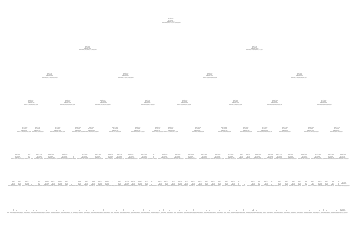

In [103]:
tree.plot_tree(vis_tree);

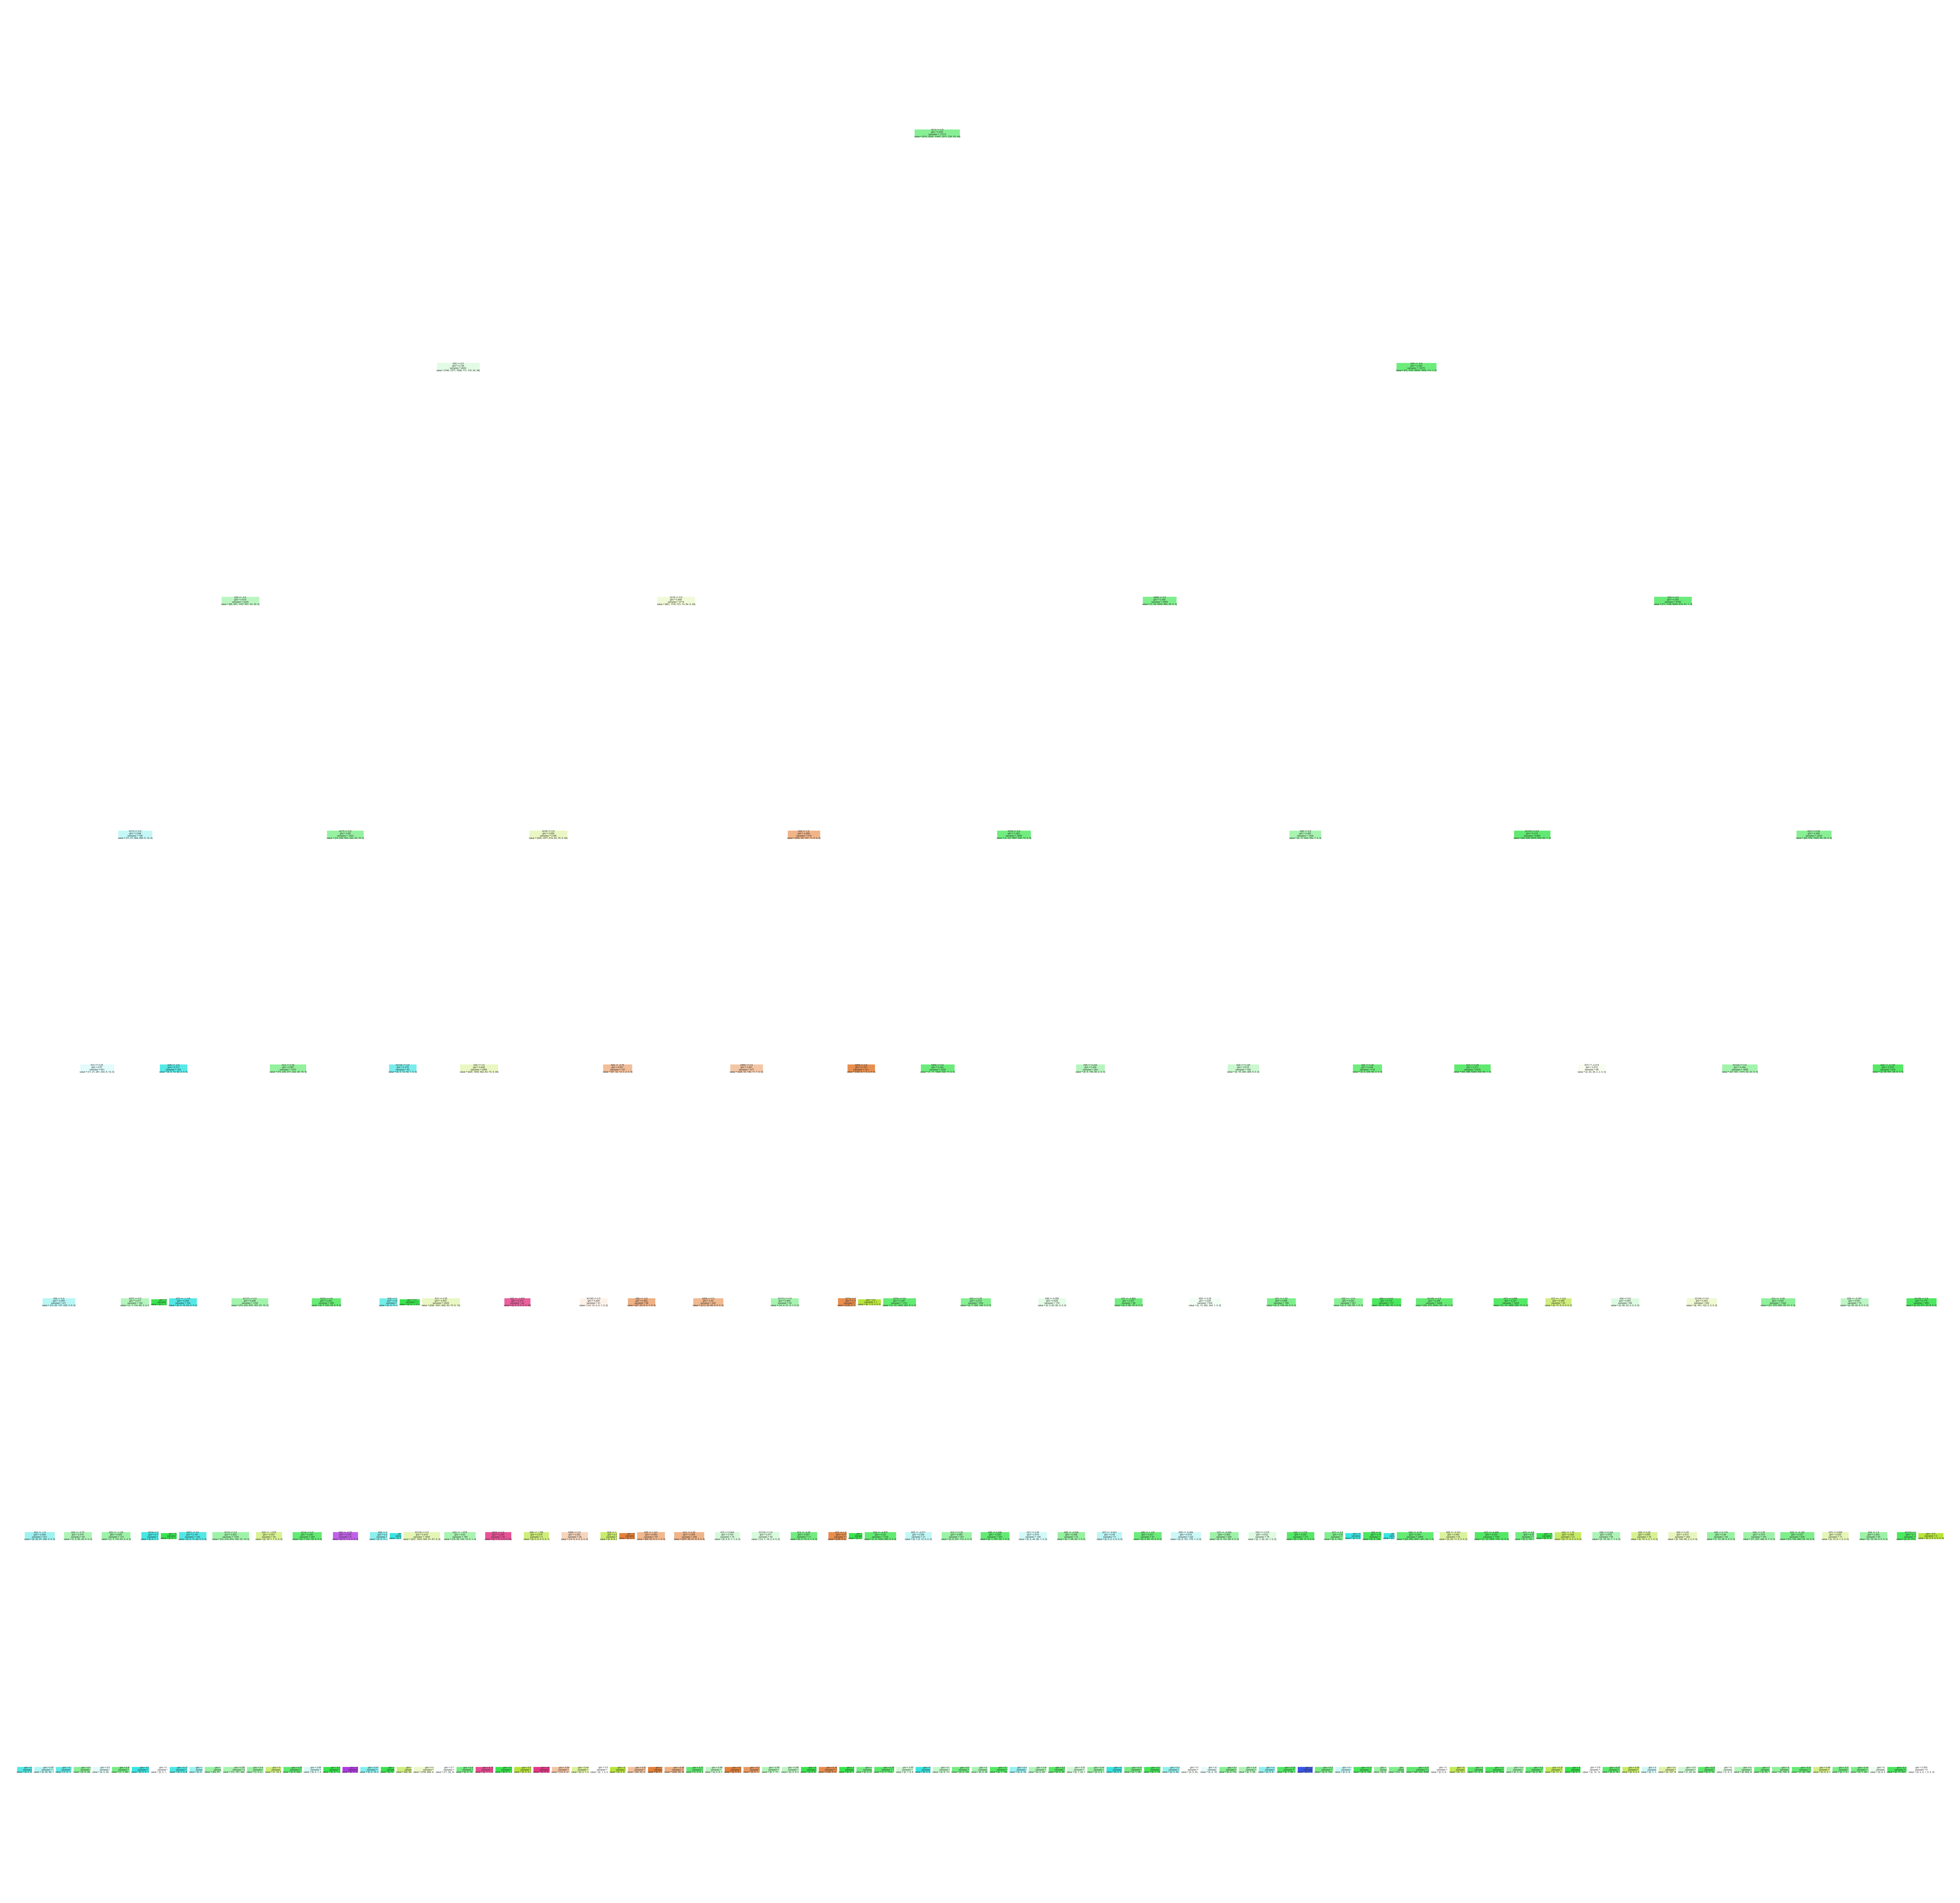

In [104]:
# fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
# cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=500)

# tree.plot_tree(clf, feature_names = fn, class_names=cn, filled = True);
tree.plot_tree(vis_tree, filled = True);
fig.savefig('DT.png')

### Linear SVM Classifier

In [105]:
from sklearn.svm import LinearSVC

l_svm = LinearSVC()
results = cross_validate(l_svm, X_train, y_train, scoring=scoring, n_jobs=-1, return_estimator=True)

In [106]:
best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
y_pred = best_estimator.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.7338877338877339
Precision: 0.8383702410435039
Recall: 0.7338877338877339
F1-Score: 0.7751904360573473


### SVM Classifier

In [107]:
from sklearn.svm import SVC

svm = SVC()
results = cross_validate(svm, X_train, y_train, cv=3, scoring=scoring, n_jobs=-1, return_estimator=True)

In [108]:
best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
y_pred = best_estimator.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.7411642411642412
Precision: 0.849069227346419
Recall: 0.7411642411642412
F1-Score: 0.7821881253403502


### KNN Classifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights='distance', n_neighbors=7)
params = {
    'metric': ['euclidean', 'hamming']
}
clf = GridSearchCV(knn, params, n_jobs=-1, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   56.4s remaining:   24.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=7, weights='distance'),
             n_jobs=-1, param_grid={'metric': ['euclidean', 'hamming']},
             verbose=2)

In [110]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.7037422037422038
Precision: 0.7947793737168092
Recall: 0.7037422037422038
F1-Score: 0.7406009043114636


In [111]:
clf.best_params_

{'metric': 'hamming'}

### Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
results = cross_validate(lr, X_train, y_train, cv=3, scoring=scoring, n_jobs=-1, return_estimator=True)

In [113]:
best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
y_pred = best_estimator.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.7422037422037422
Precision: 0.8321640752739449
Recall: 0.7422037422037422
F1-Score: 0.776726964692279


In [114]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1)
params = {
    'n_estimators': [100, 200],
    'max_depth': list(range(6, 10))
}
clf = GridSearchCV(rfc, params, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   37.2s finished


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [6, 7, 8, 9], 'n_estimators': [100, 200]},
             verbose=1)

In [115]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.7266112266112266
Precision: 0.8899078588117644
Recall: 0.7266112266112266
F1-Score: 0.7902257347707481


In [116]:
clf.best_params_

{'max_depth': 9, 'n_estimators': 200}

## Classify on Offensive Personnel

In [117]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

nfl_cleaned_class = nfl_cleaned.copy()

train_discrete_attrs = list(filter(lambda x: x != 'offenseFormation', discrete_attrs))

# Transform the nominal attributes
for attr in train_discrete_attrs:
    ohe = OneHotEncoder()
    attr_feature_arr = ohe.fit_transform(nfl_cleaned[[attr]]).toarray()
    attr_labels = [f'{attr}_{l}' for l in list(discrete_labels[attr])]
    attr_features = pd.DataFrame(attr_feature_arr, columns=attr_labels)
    attr_features.reset_index(drop=True, inplace=True)
    nfl_cleaned_class.reset_index(drop=True, inplace=True)
    nfl_cleaned_class = pd.concat([nfl_cleaned_class, attr_features], axis=1)

Drop the original nominal attributes except the play results

In [118]:
nfl_cleaned_class = nfl_cleaned_class.drop(columns=train_discrete_attrs)

Scale the continuous-valued attributes using sklearn's `RobustScaler`

In [119]:
from sklearn.preprocessing import RobustScaler

continuous_attrs = [
    'quarter', 
    'down', 
    'yardsToGo', 
    'defendersInTheBox', 
    'numberOfPassRushers',
    'preSnapVisitorScore',
    'preSnapHomeScore',
    'absoluteYardlineNumber',
#     'offensePlayResult',
#     'playResult',
    'epa'
]

rs = RobustScaler()

nfl_cleaned_class[continuous_attrs] = rs.fit_transform(nfl_cleaned_class[continuous_attrs])

Change the boolean types to 0/1

In [120]:
nfl_cleaned_class['under2mins'] = nfl_cleaned_class['under2mins'].astype(int)

Pull out the EPA (which should not be used for classification since it is recorded after the result of a play)

In [121]:
nfl_cleaned_class = nfl_cleaned_class.drop(columns=['epa'])

In [122]:
nfl_cleaned_class

,quarter,down,yardsToGo,offenseFormation,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,isDefensivePI,under2mins,"personnelO_2 RB, 1 TE, 2 WR","personnelO_1 RB, 1 TE, 3 WR","personnelO_2 RB, 3 TE, 0 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_2 RB, 0 TE, 3 WR","personnelO_2 RB, 2 TE, 1 WR","personnelO_0 RB, 1 TE, 4 WR","personnelO_6 OL, 1 RB, 1 TE, 2 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_6 OL, 1 RB, 2 TE, 1 WR","personnelO_1 RB, 1 TE, 2 WR,1 DL","personnelO_2 QB, 0 RB, 1 TE, 3 WR","personnelO_2 QB, 1 RB, 1 TE, 2 WR","personnelO_6 OL, 2 RB, 0 TE, 2 WR","personnelO_6 OL, 2 RB, 2 TE, 0 WR","personnelO_3 RB, 1 TE, 1 WR","personnelO_0 RB, 2 TE, 3 WR","personnelO_1 RB, 2 TE, 1 WR,1 DL","personnelO_6 OL, 1 RB, 3 TE, 0 WR","personnelO_6 OL, 2 RB, 1 TE, 1 WR","personnelO_0 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,4 DB","personnelO_3 RB, 2 TE, 0 WR","personnelO_6 OL, 1 RB, 2 TE, 0 WR,1 DL","personnelO_1 RB, 0 TE, 3 WR,1 DL","personnelO_6 OL, 0 RB, 1 TE, 0 WR,1 P,1 LS,1 DL,1 K","personnelO_1 RB, 1 TE, 2 WR,1 P,3 LB,1 LS,2 DB","personnelO_0 RB, 3 TE, 2 WR","personnelO_1 RB, 0 TE, 0 WR,1 P,4 LB,1 LS,3 DB","personnelO_1 RB, 4 TE, 0 WR","personnelO_6 OL, 1 RB, 1 TE, 1 WR,1 DL","personnelO_2 QB, 1 RB, 2 TE, 1 WR","personnelO_6 OL, 1 RB, 0 TE, 3 WR","personnelO_2 QB, 2 RB, 2 TE, 0 WR","personnelO_3 RB, 0 TE, 2 WR","personnelO_2 QB, 1 RB, 1 TE, 1 WR,1 DL","personnelO_1 RB, 0 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB","personnelO_2 QB, 2 RB, 1 TE, 1 WR","personnelO_2 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,2 DB","personnelO_1 RB, 2 TE, 1 WR,1 DB","personnelO_4 RB, 1 TE, 0 WR","personnelO_0 RB, 1 TE, 0 WR,1 P,1 LS,2 DL,1 K","personnelO_1 RB, 1 TE, 1 WR,1 P,4 LB,1 LS,1 DL,1 DB","personnelO_1 RB, 0 TE, 3 WR,1 DB","personnelO_1 RB, 2 TE, 1 WR,1 P,4 LB,1 LS,1 DB","personnelO_1 RB, 1 TE, 2 WR","personnelO_0 RB, 2 TE, 0 WR,1 P,1 LS,1 DL,1 K","personnelO_0 RB, 0 TE, 5 WR","personnelO_1 RB, 1 TE, 2 WR,1 DB","personnelO_1 RB, 2 TE, 1 WR,1 P,2 LB,1 LS,3 DB","personnelO_6 OL, 2 RB, 1 TE, 0 WR,1 DL","personnelO_0 RB, 1 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB","personnelO_6 OL, 0 RB, 0 TE, 0 WR,4 DL","personnelO_2 QB, 1 RB, 0 TE, 3 WR","personnelO_0 RB, 1 TE, 1 WR,1 P,3 LB,1 LS,1 DL,3 DB","personnelO_7 OL, 0 RB, 1 TE, 0 WR,1 P,1 LS,1 K","personnelD_4 DL, 2 LB, 5 DB","personnelD_4 DL, 1 LB, 6 DB","personnelD_6 DL, 3 LB, 2 DB","personnelD_3 DL, 3 LB, 5 DB","personnelD_4 DL, 3 LB, 4 DB","personnelD_3 DL, 4 LB, 4 DB","personnelD_2 DL, 3 LB, 6 DB","personnelD_2 DL, 4 LB, 5 DB","personnelD_3 DL, 2 LB, 6 DB","personnelD_1 DL, 5 LB, 5 DB","personnelD_5 DL, 1 LB, 5 DB","personnelD_0 DL, 6 LB, 5 DB","personnelD_1 DL, 4 LB, 6 DB","personnelD_3 DL, 1 LB, 7 DB","personnelD_3 DL, 1 LB, 6 DB, 1 TE","personnelD_4 DL, 4 LB, 3 DB","personnelD_5 DL, 3 LB, 3 DB","personnelD_0 DL, 5 LB, 6 DB","personnelD_1 DL, 3 LB, 7 DB","personnelD_5 DL, 2 LB, 4 DB","personnelD_1 DL, 4 LB, 5 DB","personnelD_6 DL, 4 LB, 1 DB","personnelD_2 DL, 2 LB, 7 DB","personnelD_3 DL, 5 LB, 3 DB","personnelD_0 DL, 3 LB, 4 DB, 3 RB,1 QB","personnelD_3 DL, 2 LB, 5 DB, 1 WR","personnelD_3 DL, 2 LB, 5 DB","personnelD_5 DL, 4 LB, 2 DB","personnelD_0 DL, 4 LB, 7 DB","personnelD_4 DL, 2 LB, 4 DB","personnelD_6 DL, 1 LB, 4 DB","personnelD_4 DL, 3 LB, 3 DB, 1 WR","personnelD_4 DL, 5 LB, 2 DB","personnelD_2 DL, 2 LB, 6 DB, 1 WR","personnelD_2 DL, 3 LB, 5 DB","personnelD_0 DL, 4 LB, 4 DB, 1 RB,2 WR","personnelD_6 DL, 2 LB, 3 DB","personnelD_5 DL, 3 LB, 2 DB, 1 OL","personnelD_2 DL, 3 LB, 5 DB, 1 WR","personnelD_4 DL, 0 LB, 7 DB","personnelD_3 DL, 1 LB, 6 DB, 1 WR","personnelD_3 DL, 0 LB, 8 DB","personnelD_1 DL, 3 LB, 5 DB, 1 TE,1 WR","personnelD_1 DL, 4 LB, 3 DB, 1 RB,2 WR","personnelD_2 DL, 4 LB, 4 DB","personnelD_0 DL, 4 LB, 4 DB, 1 TE,2 WR","personnelD_0 DL, 2 LB, 4 DB, 3 RB,2 WR","personnelD_4 DL, 4 LB, 2 DB","personnelD_3 DL, 3 LB, 4 DB, 1 WR","personnelD_0 DL, 3 LB, 3 DB, 2 RB,2 TE,1 WR","personnelD_5 DL, 5 LB, 1 DB","personnelD_1 DL, 4 LB, 5 DB, 1 RB","personn

### split train/test

In [123]:
X = nfl_cleaned_class.drop(columns=['offenseFormation'])
y = nfl_cleaned_class['offenseFormation'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### decision trees

In [124]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
params = {
    'max_depth': list(range(1, 10)),
    'max_features': [60, 100, 120, 'log2', None]
}
clf = GridSearchCV(dt, params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [60, 100, 120, 'log2', None]})

In [125]:
clf.best_params_

{'max_depth': 7, 'max_features': None}

In [126]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.7468814968814969
Precision: 0.8082570588798116
Recall: 0.7468814968814969
F1-Score: 0.7712319937175306


### try to visualize DT

In [127]:
# sklearn.__version__
from sklearn import tree

In [128]:
# vis_tree = DecisionTreeClassifier(max_depth = 2, random_state = 0)
vis_tree = DecisionTreeClassifier(max_depth = 7, max_features = None)

In [129]:
vis_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

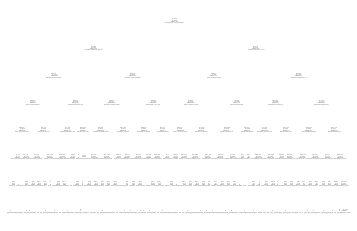

In [130]:
tree.plot_tree(vis_tree);

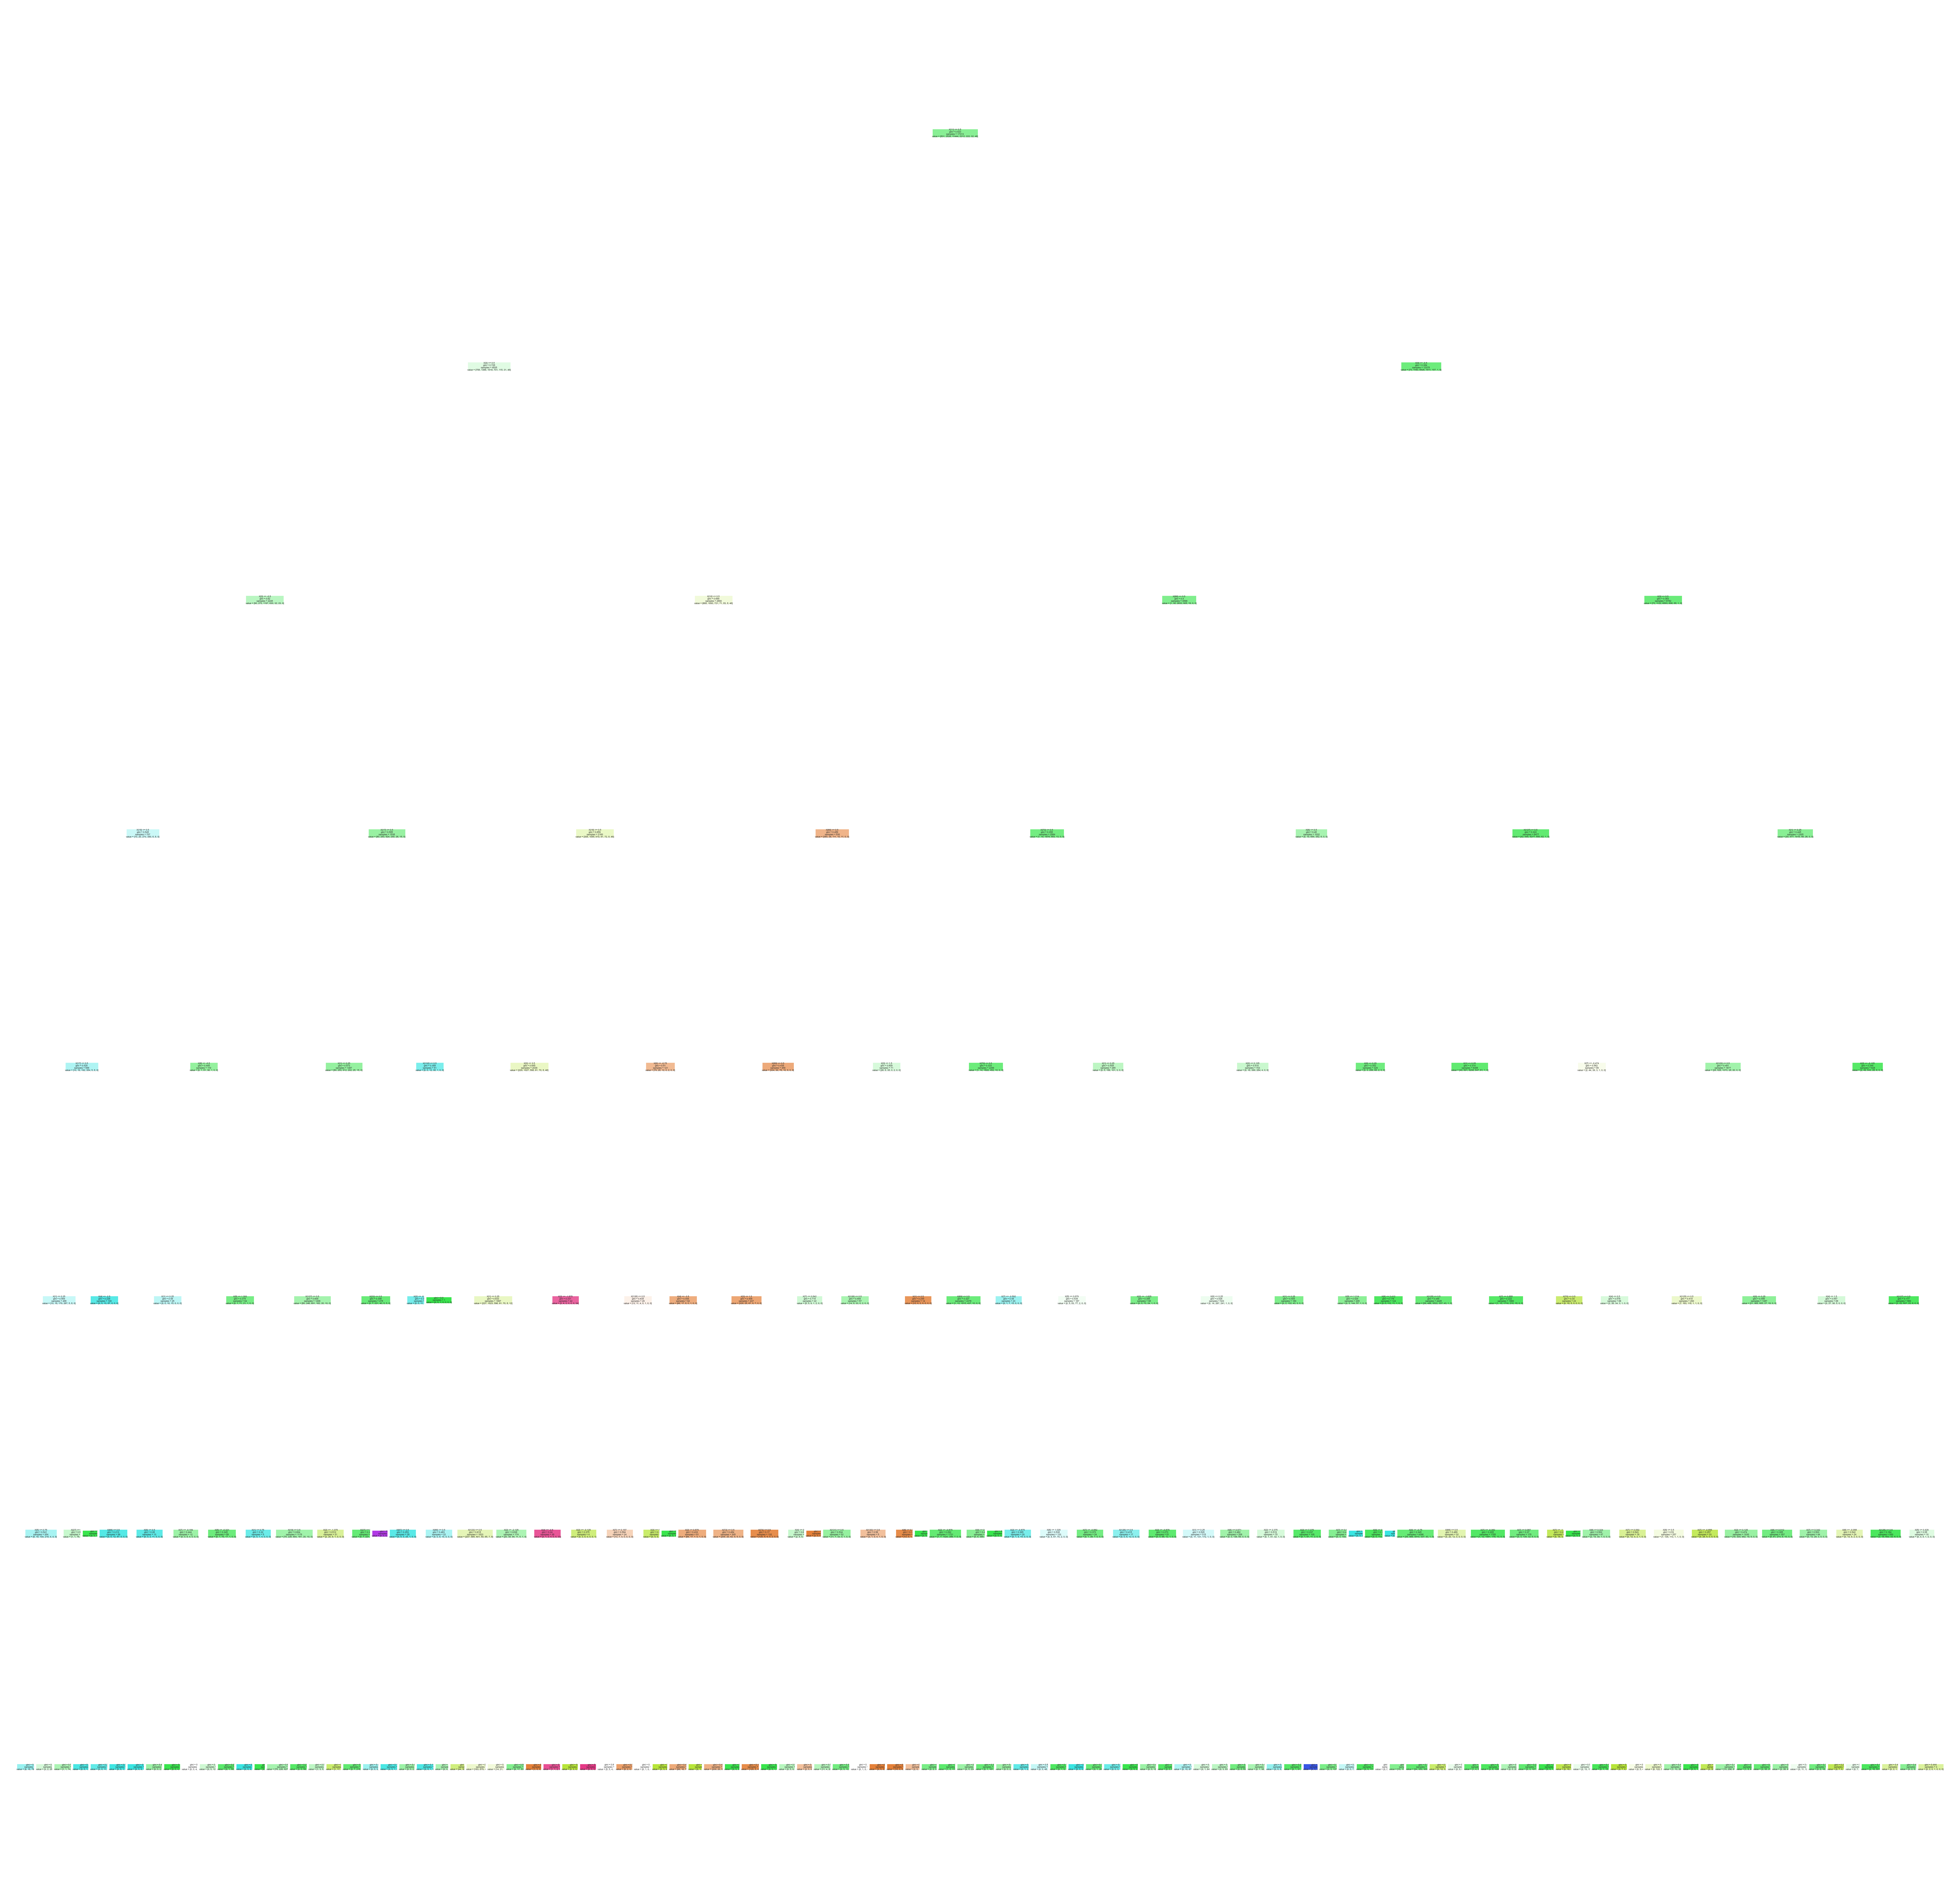

In [131]:
# fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
# cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=500)

# tree.plot_tree(clf, feature_names = fn, class_names=cn, filled = True);
tree.plot_tree(vis_tree, filled = True);
fig.savefig('DT.png')

### Linear SVM Classifier

In [132]:
from sklearn.svm import LinearSVC

l_svm = LinearSVC()
results = cross_validate(l_svm, X_train, y_train, scoring=scoring, n_jobs=-1, return_estimator=True)

In [133]:
best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
y_pred = best_estimator.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.7453222453222453
Precision: 0.8509729432555182
Recall: 0.7453222453222453
F1-Score: 0.7870842245249846


### SVM Classifier

In [134]:
from sklearn.svm import SVC

svm = SVC()
results = cross_validate(svm, X_train, y_train, cv=3, scoring=scoring, n_jobs=-1, return_estimator=True)

In [135]:
best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
y_pred = best_estimator.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.7474012474012474
Precision: 0.8622655034592303
Recall: 0.7474012474012474
F1-Score: 0.7920517090014915


### KNN Classifier

In [136]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights='distance', n_neighbors=7)
params = {
    'metric': ['euclidean', 'hamming']
}
clf = GridSearchCV(knn, params, n_jobs=-1, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   57.0s remaining:   24.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.2min finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=7, weights='distance'),
             n_jobs=-1, param_grid={'metric': ['euclidean', 'hamming']},
             verbose=2)

In [137]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.7219334719334719
Precision: 0.8015347597257468
Recall: 0.7219334719334719
F1-Score: 0.7536912339780667


In [138]:
clf.best_params_

{'metric': 'hamming'}

### Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
results = cross_validate(lr, X_train, y_train, cv=3, scoring=scoring, n_jobs=-1, return_estimator=True)

In [140]:
best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
y_pred = best_estimator.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.75
Precision: 0.8439368075520765
Recall: 0.75
F1-Score: 0.7873413303241624


In [141]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1)
params = {
    'n_estimators': [100, 200],
    'max_depth': list(range(6, 10))
}
clf = GridSearchCV(rfc, params, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   40.0s finished


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [6, 7, 8, 9], 'n_estimators': [100, 200]},
             verbose=1)

In [142]:
y_pred = clf.predict(X_test)
print_scores(y_pred, y_test)

Summary
------------------------------
Accuracy: 0.7416839916839917
Precision: 0.893760879257502
Recall: 0.7416839916839917
F1-Score: 0.8006947854353282


In [143]:
clf.best_params_

{'max_depth': 9, 'n_estimators': 200}

# TRY OUT EPA

In [144]:
# Drop irrelevant columns
nfl_cleaned = nfl_data.drop(columns=[
    'gameId', 
    'playId', 
    'playDescription', 
    'possessionTeam', 
#     'playType', 
    'yardlineNumber', 
    'yardlineSide',
    'penaltyJerseyNumbers',
    'penaltyCodes',
#     'offensePlayResult',
#     'playResult'
])

In [145]:
# Look at null values
nfl_cleaned.isnull().sum()

quarter                     0
down                        0
yardsToGo                   0
playType                    0
offenseFormation          141
personnelO                 29
defendersInTheBox          62
numberOfPassRushers       633
personnelD                 29
typeDropback              639
preSnapVisitorScore       639
preSnapHomeScore          639
gameClock                 639
absoluteYardlineNumber    639
passResult                  2
offensePlayResult           0
playResult                  0
epa                         0
isDefensivePI               0
dtype: int64

In [146]:
# Drop pass result rows with nans
nfl_cleaned = nfl_cleaned.dropna(subset=['passResult'])

In [147]:
# Add game clock column under 2 minutes
def is_under_minutes(mins=2):
    def _is_under(x: str) -> bool:
        if pd.isna(x):
            return False
        num_rep = int("".join(filter(str.isdigit, x)))
        return num_rep <= mins*10000
    return _is_under

nfl_cleaned['under2mins'] = nfl_cleaned['gameClock'].apply(is_under_minutes(2))
nfl_cleaned = nfl_cleaned.drop(columns=['gameClock'])

In [148]:
# Fill in columns with missing data
nfl_cleaned['playType'].fillna(nfl_data['playType'].mode()[0], inplace=True)
nfl_cleaned['offenseFormation'].fillna(nfl_data['offenseFormation'].mode()[0], inplace=True)
nfl_cleaned['personnelO'].fillna(nfl_data['personnelO'].mode()[0], inplace=True)
nfl_cleaned['personnelD'].fillna(nfl_data['personnelO'].mode()[0], inplace=True)
nfl_cleaned['typeDropback'].fillna(nfl_data['typeDropback'].mode()[0], inplace=True)
nfl_cleaned['numberOfPassRushers'].fillna(nfl_data['numberOfPassRushers'].median(), inplace=True)
nfl_cleaned['preSnapVisitorScore'].fillna(nfl_cleaned['preSnapVisitorScore'].median(), inplace=True)
nfl_cleaned['preSnapHomeScore'].fillna(nfl_cleaned['preSnapHomeScore'].median(), inplace=True)
nfl_cleaned['isDefensivePI'].fillna(nfl_cleaned['isDefensivePI'].mode(), inplace=True)
nfl_cleaned['defendersInTheBox'].fillna(nfl_cleaned['defendersInTheBox'].median(), inplace=True)
nfl_cleaned['absoluteYardlineNumber'].fillna(nfl_cleaned['absoluteYardlineNumber'].median(), inplace=True)

In [149]:
# Ensure there are no more missing values
nfl_cleaned.isnull().sum()

quarter                   0
down                      0
yardsToGo                 0
playType                  0
offenseFormation          0
personnelO                0
defendersInTheBox         0
numberOfPassRushers       0
personnelD                0
typeDropback              0
preSnapVisitorScore       0
preSnapHomeScore          0
absoluteYardlineNumber    0
passResult                0
offensePlayResult         0
playResult                0
epa                       0
isDefensivePI             0
under2mins                0
dtype: int64

In [150]:
# View uniques for the discrete attributes
discrete_attrs = ['playType', 'offenseFormation', 'personnelO', 'personnelD', 'typeDropback', 'passResult']
# discrete_attrs = ['offenseFormation', 'personnelO', 'personnelD', 'typeDropback', 'passResult']
print('Attribute unique values')
print('-'*30)
for attr in discrete_attrs:
        print(f'{attr}: {len(nfl_cleaned[attr].unique())}')

Attribute unique values
------------------------------
playType: 3
offenseFormation: 7
personnelO: 56
personnelD: 57
typeDropback: 7
passResult: 5


In [151]:
# Encode the categorical attributes as integers
discrete_labels = {} # Store the labels found
for attr in discrete_attrs:
    nfl_cleaned[attr], uniques = pd.factorize(nfl_cleaned[attr])
    discrete_labels[attr] = uniques

## preprocessing for EPA

In [152]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

nfl_cleaned_class = nfl_cleaned.copy()

train_discrete_attrs = list(filter(lambda x: x != 'epa', discrete_attrs))

# Transform the nominal attributes
for attr in train_discrete_attrs:
    ohe = OneHotEncoder()
    attr_feature_arr = ohe.fit_transform(nfl_cleaned[[attr]]).toarray()
    attr_labels = [f'{attr}_{l}' for l in list(discrete_labels[attr])]
    attr_features = pd.DataFrame(attr_feature_arr, columns=attr_labels)
    attr_features.reset_index(drop=True, inplace=True)
    nfl_cleaned_class.reset_index(drop=True, inplace=True)
    nfl_cleaned_class = pd.concat([nfl_cleaned_class, attr_features], axis=1)

Drop the original nominal attributes except the play results

In [153]:
nfl_cleaned_class = nfl_cleaned_class.drop(columns=train_discrete_attrs)

Scale the continuous-valued attributes using sklearn's `RobustScaler`

In [154]:
from sklearn.preprocessing import RobustScaler

continuous_attrs = [
    'quarter', 
    'down', 
    'yardsToGo', 
    'defendersInTheBox', 
    'numberOfPassRushers',
    'preSnapVisitorScore',
    'preSnapHomeScore',
    'absoluteYardlineNumber',
    'offensePlayResult',
    'playResult',
    'epa'
]

rs = RobustScaler()

nfl_cleaned_class[continuous_attrs] = rs.fit_transform(nfl_cleaned_class[continuous_attrs])

Change the boolean types to 0/1

In [155]:
nfl_cleaned_class['under2mins'] = nfl_cleaned_class['under2mins'].astype(int)

Pull out the EPA (which should not be used for classification since it is recorded after the result of a play)

In [156]:
# nfl_cleaned_class = nfl_cleaned_class.drop(columns=['epa'])

## Split for Train/Test

In [157]:
nfl_cleaned_class

,quarter,down,yardsToGo,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,offensePlayResult,playResult,epa,isDefensivePI,under2mins,playType_play_type_pass,playType_play_type_sack,playType_play_type_unknown,offenseFormation_I_FORM,offenseFormation_SINGLEBACK,offenseFormation_SHOTGUN,offenseFormation_EMPTY,offenseFormation_PISTOL,offenseFormation_WILDCAT,offenseFormation_JUMBO,"personnelO_2 RB, 1 TE, 2 WR","personnelO_1 RB, 1 TE, 3 WR","personnelO_2 RB, 3 TE, 0 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_2 RB, 0 TE, 3 WR","personnelO_2 RB, 2 TE, 1 WR","personnelO_0 RB, 1 TE, 4 WR","personnelO_6 OL, 1 RB, 1 TE, 2 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_6 OL, 1 RB, 2 TE, 1 WR","personnelO_1 RB, 1 TE, 2 WR,1 DL","personnelO_2 QB, 0 RB, 1 TE, 3 WR","personnelO_2 QB, 1 RB, 1 TE, 2 WR","personnelO_6 OL, 2 RB, 0 TE, 2 WR","personnelO_6 OL, 2 RB, 2 TE, 0 WR","personnelO_3 RB, 1 TE, 1 WR","personnelO_0 RB, 2 TE, 3 WR","personnelO_1 RB, 2 TE, 1 WR,1 DL","personnelO_6 OL, 1 RB, 3 TE, 0 WR","personnelO_6 OL, 2 RB, 1 TE, 1 WR","personnelO_0 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,4 DB","personnelO_3 RB, 2 TE, 0 WR","personnelO_6 OL, 1 RB, 2 TE, 0 WR,1 DL","personnelO_1 RB, 0 TE, 3 WR,1 DL","personnelO_6 OL, 0 RB, 1 TE, 0 WR,1 P,1 LS,1 DL,1 K","personnelO_1 RB, 1 TE, 2 WR,1 P,3 LB,1 LS,2 DB","personnelO_0 RB, 3 TE, 2 WR","personnelO_1 RB, 0 TE, 0 WR,1 P,4 LB,1 LS,3 DB","personnelO_1 RB, 4 TE, 0 WR","personnelO_6 OL, 1 RB, 1 TE, 1 WR,1 DL","personnelO_2 QB, 1 RB, 2 TE, 1 WR","personnelO_6 OL, 1 RB, 0 TE, 3 WR","personnelO_2 QB, 2 RB, 2 TE, 0 WR","personnelO_3 RB, 0 TE, 2 WR","personnelO_2 QB, 1 RB, 1 TE, 1 WR,1 DL","personnelO_1 RB, 0 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB","personnelO_2 QB, 2 RB, 1 TE, 1 WR","personnelO_2 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,2 DB","personnelO_1 RB, 2 TE, 1 WR,1 DB","personnelO_4 RB, 1 TE, 0 WR","personnelO_0 RB, 1 TE, 0 WR,1 P,1 LS,2 DL,1 K","personnelO_1 RB, 1 TE, 1 WR,1 P,4 LB,1 LS,1 DL,1 DB","personnelO_1 RB, 0 TE, 3 WR,1 DB","personnelO_1 RB, 2 TE, 1 WR,1 P,4 LB,1 LS,1 DB","personnelO_1 RB, 1 TE, 2 WR","personnelO_0 RB, 2 TE, 0 WR,1 P,1 LS,1 DL,1 K","personnelO_0 RB, 0 TE, 5 WR","personnelO_1 RB, 1 TE, 2 WR,1 DB","personnelO_1 RB, 2 TE, 1 WR,1 P,2 LB,1 LS,3 DB","personnelO_6 OL, 2 RB, 1 TE, 0 WR,1 DL","personnelO_0 RB, 1 TE, 0 WR,1 P,3 LB,1 LS,1 DL,4 DB","personnelO_6 OL, 0 RB, 0 TE, 0 WR,4 DL","personnelO_2 QB, 1 RB, 0 TE, 3 WR","personnelO_0 RB, 1 TE, 1 WR,1 P,3 LB,1 LS,1 DL,3 DB","personnelO_7 OL, 0 RB, 1 TE, 0 WR,1 P,1 LS,1 K","personnelD_4 DL, 2 LB, 5 DB","personnelD_4 DL, 1 LB, 6 DB","personnelD_6 DL, 3 LB, 2 DB","personnelD_3 DL, 3 LB, 5 DB","personnelD_4 DL, 3 LB, 4 DB","personnelD_3 DL, 4 LB, 4 DB","personnelD_2 DL, 3 LB, 6 DB","personnelD_2 DL, 4 LB, 5 DB","personnelD_3 DL, 2 LB, 6 DB","personnelD_1 DL, 5 LB, 5 DB","personnelD_5 DL, 1 LB, 5 DB","personnelD_0 DL, 6 LB, 5 DB","personnelD_1 DL, 4 LB, 6 DB","personnelD_3 DL, 1 LB, 7 DB","personnelD_3 DL, 1 LB, 6 DB, 1 TE","personnelD_4 DL, 4 LB, 3 DB","personnelD_5 DL, 3 LB, 3 DB","personnelD_0 DL, 5 LB, 6 DB","personnelD_1 DL, 3 LB, 7 DB","personnelD_5 DL, 2 LB, 4 DB","personnelD_1 DL, 4 LB, 5 DB","personnelD_6 DL, 4 LB, 1 DB","personnelD_2 DL, 2 LB, 7 DB","personnelD_3 DL, 5 LB, 3 DB","personnelD_0 DL, 3 LB, 4 DB, 3 RB,1 QB","personnelD_3 DL, 2 LB, 5 DB, 1 WR","personnelD_3 DL, 2 LB, 5 DB","personnelD_5 DL, 4 LB, 2 DB","personnelD_0 DL, 4 LB, 7 DB","personnelD_4 DL, 2 LB, 4 DB","personnelD_6 DL, 1 LB, 4 DB","personnelD_4 DL, 3 LB, 3 DB, 1 WR","personnelD_4 DL, 5 LB, 2 DB","personnelD_2 DL, 2 LB, 6 DB, 1 WR","personnelD_2 DL, 3 LB, 5 DB","personnelD_0 DL, 4 LB, 4 DB, 1 RB,2 WR","personnelD_6 DL, 2 LB, 3 DB","personnelD_5 DL, 3 LB, 2 DB, 1 OL","personnelD_2 DL, 3 LB, 5 DB, 1 WR","personnelD_4 DL, 0 LB, 7 DB","personnelD_3 DL, 1 LB, 6 DB, 1 WR","personnelD_3 DL, 0 LB, 8 DB","personnelD_1 DL, 3 LB, 5 DB, 1 TE,1 WR","personnelD_1 DL, 4 LB, 3 DB, 1 RB,2 WR","personnelD_2 DL, 4 LB, 4 DB","pers

Finally, split the data for training and testing

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

X = nfl_cleaned_class.drop(columns=['epa'])
y = nfl_cleaned_class['epa'].to_numpy()
# X, y = make_regression(n_features=4, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Define a utility function to print off various metrics

In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_scores(pred, expected):
    print('Summary')
    print('-'*30)
    print(f'Accuracy: {accuracy_score(pred, expected)}')
    print(f'Precision: {precision_score(pred, expected, average="weighted")}')
    print(f'Recall: {recall_score(pred, expected, average="weighted")}')
    print(f'F1-Score: {f1_score(pred, expected, average="weighted")}')

Import necessary functions for classifying and do some initialization

In [164]:
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

### decision trees

In [165]:
from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier()
# params = {
#     'max_depth': list(range(1, 10)),
#     'max_features': [60, 100, 120, 'log2', None]
# }
# clf = GridSearchCV(dt, params)
# clf.fit(X_train, y_train)

In [166]:
regressor = DecisionTreeRegressor(random_state=0)
params = {
    'max_depth': list(range(1, 10)),
    'max_features': [60, 100, 120, 'log2', None]
}
# cross_val_score(regressor, X, y, cv=10)
clf = GridSearchCV(regressor, params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [60, 100, 120, 'log2', None]})

In [167]:
clf.best_params_

{'max_depth': 8, 'max_features': None}

In [168]:
y_pred = clf.predict(X_test)
# print_scores(y_pred, y_test)
dt_scores = cross_val_score(regressor, X, y, cv=5)
print("mean cross validation score: {}".format(np.mean(dt_scores)))

mean cross validation score: 0.6497225170305924


### Linear SVM

In [169]:
from sklearn.svm import LinearSVR

l_svm = LinearSVR()
# results = cross_val_score(l_svm, X_train, y_train, cv=5)
results = cross_val_score(l_svm, X, y, cv=5)
print("mean cross validation score: {}".format(np.mean(results)))

mean cross validation score: 0.6806524100969129


In [ ]:
# best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
# y_pred = best_estimator.predict(X_test)
# print_scores(y_pred, y_test)

### SVM Classifier

In [170]:
from sklearn.svm import SVR

svm = SVR()
# results = cross_val_score(l_svm, X_train, y_train, cv=5)
results = cross_val_score(l_svm, X, y, cv=5)
print("mean cross validation score: {}".format(np.mean(results)))

mean cross validation score: 0.6798127406659156


In [ ]:
# best_estimator = results['estimator'][np.argmax(results['test_f1_weighted'])]
# y_pred = best_estimator.predict(X_test)
# print_scores(y_pred, y_test)